# Meander wavelength/Discharge Analysis 

## Import packages 

In [1]:
import data_methods as dm 
import os
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import math 
from geopy import distance 

## Get all data 

Acquire all segmented data (handpicked by Char/Brynn), and the Leopold/Wolman data (transcribed by Sam)

In [2]:
segment_folder = r'C:\Users\bydd1\OneDrive\Documents\Research\MS Sinuosity Data\Amazon Segments'
comparison_path = r'C:\Users\bydd1\OneDrive\Documents\Research\MS Sinuosity Data\Data from Sam\LeopoldWolmanApp8.xlsx'
compressed_discharge_path = r'C:\Users\bydd1\OneDrive\Documents\Research\MS Sinuosity Data\compressed_ra.pickle'  

segments = os.listdir(segment_folder)
comp_x = pd.read_excel(comparison_path)

seg_data_wave = []
seg_data_dis = []
stds = []
for seg in segments:
    if seg != 'data_descriptions.txt':
        if seg[0] != '~':
            path = os.path.join(segment_folder, seg)
            seg_x = pd.read_excel(path)
            x1 = (max(seg_x['lat']), max(seg_x['lon']))
            x2 = (min(seg_x['lat']), min(seg_x['lon']))
            swing = distance.distance(x1, x2).km
            
            dm.assign_cop_to_latlon_alternative(path, compressed_discharge_path)
            seg_x = pd.read_excel(path)

            seg_data_wave.append(seg_x['Meandwave'].tolist())
            seg_data_dis.append(seg_x['max_dis'].tolist())

leopold_x = pd.read_excel(comparison_path)
leopold_wave = leopold_x['Wavelength (m)'].tolist()
leopold_dis = leopold_x['Qbankfull (cms)'].tolist()

entry 0
writing new columns to dataframe...
rewriting excel file with 9 new columns...
--- 0.423612117767334 seconds ---
entry 0
writing new columns to dataframe...
rewriting excel file with 9 new columns...
--- 0.34816884994506836 seconds ---
entry 0
writing new columns to dataframe...
rewriting excel file with 9 new columns...
--- 0.2812495231628418 seconds ---
entry 0
writing new columns to dataframe...
rewriting excel file with 9 new columns...
--- 0.4607679843902588 seconds ---
entry 0
writing new columns to dataframe...
rewriting excel file with 9 new columns...
--- 0.3680143356323242 seconds ---
entry 0
writing new columns to dataframe...
rewriting excel file with 9 new columns...
--- 0.3054938316345215 seconds ---


C:\Users\bydd1\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


entry 0
writing new columns to dataframe...
rewriting excel file with 9 new columns...
--- 0.43181490898132324 seconds ---
entry 0
writing new columns to dataframe...
rewriting excel file with 9 new columns...
--- 0.35860443115234375 seconds ---
entry 0
writing new columns to dataframe...
rewriting excel file with 9 new columns...
--- 0.2932131290435791 seconds ---
entry 0
writing new columns to dataframe...
rewriting excel file with 9 new columns...
--- 0.30817580223083496 seconds ---
entry 0
writing new columns to dataframe...
rewriting excel file with 9 new columns...
--- 0.30861377716064453 seconds ---
entry 0
writing new columns to dataframe...
rewriting excel file with 9 new columns...
--- 0.2852034568786621 seconds ---
entry 0
writing new columns to dataframe...
rewriting excel file with 9 new columns...
--- 0.2712376117706299 seconds ---


## Visualize

Text(0, 0.5, 'discharge [cms]')

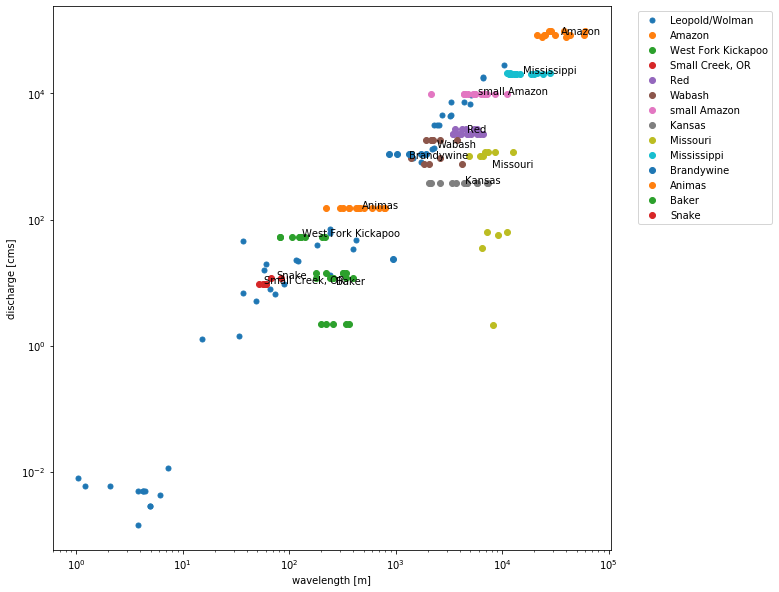

In [27]:
plt.figure(figsize = (10,10))
leg = ['Leopold/Wolman','Amazon', 'West Fork Kickapoo','Small Creek, OR', 'Red', 'Wabash', 'small Amazon', 'Kansas', 'Missouri', 'Mississippi', 'Brandywine', 'Animas', 'Baker', 'Snake']

plt.plot(leopold_wave, leopold_dis, '.', markersize = 10)

for i in range(len(seg_data_wave)):
    plt.plot(seg_data_wave[i], seg_data_dis[i], '.', markersize = 12)
    plt.text(np.mean(seg_data_wave[i]), np.mean(seg_data_dis[i]), s = leg[1 + i])
plt.legend(leg,bbox_to_anchor=(1.04,1))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('wavelength [m]')
plt.ylabel('discharge [cms]')


Text(0, 0.5, 'discharge [cms]')

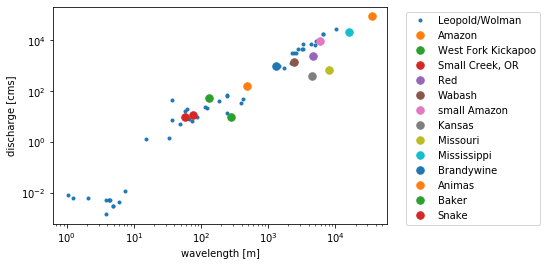

In [4]:
plt.figure()
plt.plot(leopold_wave, leopold_dis, '.')
average_w = []
average_d = []
for i in range(len(seg_data_wave)):
    avg_w = np.mean(np.asarray(seg_data_wave[i]))
    avg_d = np.mean(np.asarray(seg_data_dis[i]))
    plt.plot(avg_w, avg_d, '.', markersize = 15)
    average_w.append(avg_w)
    average_d.append(avg_d)
plt.legend(leg,bbox_to_anchor=(1.04,1))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('wavelength [m]')
plt.ylabel('discharge [cms]')

In [29]:
np.min(avg_d)

11.84101099793504

[]


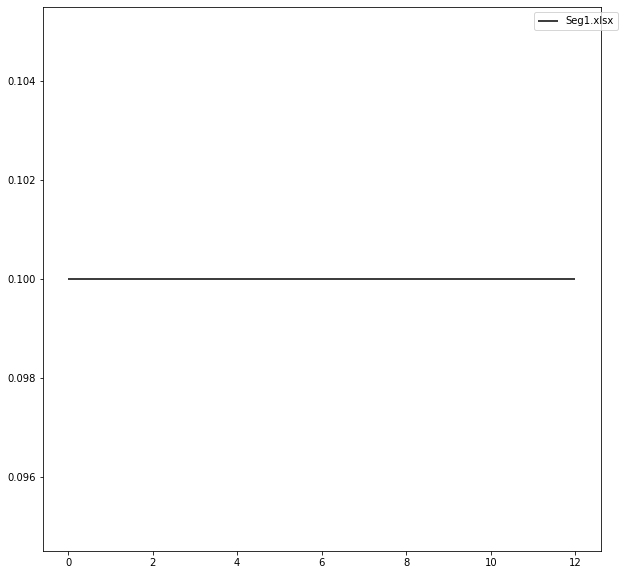

In [3]:
plt.figure(figsize = (10,10))
y = stds
x = np.arange(0, len(stds))
leg = ['Amazon', 'West Fork Kickapoo','Small Creek, OR', 'Red', 'Wabash', 'small Amazon', 'Kansas', 'Missouri', 'Mississippi', 'Brandywine', 'Animas', 'Baker', 'Snake']

for i in range(len(y)):
    plt.plot(x[i], y[i], '.')
    plt.text(x[i], y[i], s = segments[1:][i])
    
plt.hlines(0.1, xmin = 0, xmax = 12)

plt.legend(segments[1:], bbox_to_anchor = (1.04, 1))
print(stds)

In [5]:
del_ind = []
leopold_wave = np.asarray(leopold_wave)
leopold_dis = np.asarray(leopold_dis)
for i in range(len(leopold_wave)):
    if np.isnan(leopold_wave[i]) or np.isnan(leopold_dis[i]):
        del_ind.append(i)
leopold_wave = np.delete(leopold_wave, del_ind)
leopold_dis = np.delete(leopold_dis, del_ind)

our points
_______________
R^2 = 0.8641456239889727
P = 4.26455903591237e-06
Standard Error = 0.157296045740417
 
slope = 1.315742184873216
intercept = -3.3670755571557223
 
Leopold/Wolman
_______________
R^2 = 0.9487462553249768
P = 1.1289492378287676e-30
Standard Error = 0.06600572653949663
 
slope = 1.9050225003165937
intercept = -6.820722114306628
 


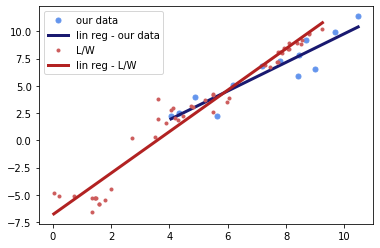

In [6]:
x_ln = np.log(average_w)
y_ln = np.log(average_d)
y_theo = dm.lin_reg(x_ln, y_ln, 'our points')

y_theo = np.sort(y_theo)

plt.figure()
plt.plot(x_ln, y_ln, '.', markersize = 10, color = 'cornflowerblue')
x_ln = np.sort(x_ln)
plt.plot(x_ln, y_theo, '-',color = 'midnightblue', linewidth = 3)

leo_w_ln = np.log(leopold_wave)
leo_d_ln = np.log(leopold_dis)
leo_d_theo = dm.lin_reg(leo_w_ln, leo_d_ln, 'Leopold/Wolman')
plt.plot(leo_w_ln, leo_d_ln, '.', color = 'indianred')
leo_d_theo = np.sort(leo_d_theo)
leo_w_ln = np.sort(leo_w_ln)
plt.plot(leo_w_ln, leo_d_theo, '-', color = 'firebrick', linewidth = 3)

plt.legend(['our data', 'lin reg - our data', 'L/W', 'lin reg - L/W'])